<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/MergedDatasetPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import warnings
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MergedDsP1.csv to MergedDsP1.csv


In [3]:
mg_DS_Actual = pd.read_csv(io.BytesIO(uploaded['MergedDsP1.csv']))
mg_DS_Actual_Copy = mg_DS_Actual.copy()

In [4]:
mg_DS_Actual_Copy.head(15)

,Age,BMI,HighChol,HighBP,Diabetes
0,9,40.0,1.0,1,0
1,7,25.0,0.0,0,0
2,9,28.0,1.0,1,0
3,11,27.0,0.0,1,0
4,11,24.0,1.0,1,0
5,10,25.0,1.0,1,0
6,9,30.0,0.0,1,0
7,11,25.0,1.0,1,0
8,9,30.0,1.0,1,1
9,8,24.0,0.0,0,0


In [78]:
print('==========Info==========')
print(mg_DS_Actual_Copy.info())
print('')
print('==========Check for number of null Values==========')
print(mg_DS_Actual_Copy.isnull().sum())
print('')
print('==========Finding no.of Unique values in each column==========')
print(mg_DS_Actual_Copy.nunique())
print('')
print('==========Description of dataset==========')
print(mg_DS_Actual_Copy.describe())

==========Info==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270182 entries, 0 to 270181
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Age       270182 non-null  int64  
 1   BMI       270182 non-null  float64
 2   HighChol  218672 non-null  float64
 3   HighBP    270182 non-null  int64  
 4   Diabetes  270182 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 10.3 MB
None

==========Check for number of null Values==========
Age             0
BMI             0
HighChol    51510
HighBP          0
Diabetes        0
dtype: int64

==========Finding no.of Unique values in each column==========
Age           14
BMI         3778
HighChol       2
HighBP         2
Diabetes       2
dtype: int64

==========Description of dataset==========
                 Age            BMI       HighChol         HighBP  \
count  270182.000000  270182.000000  218672.000000  270182.000000   
mean        7.672487      27.

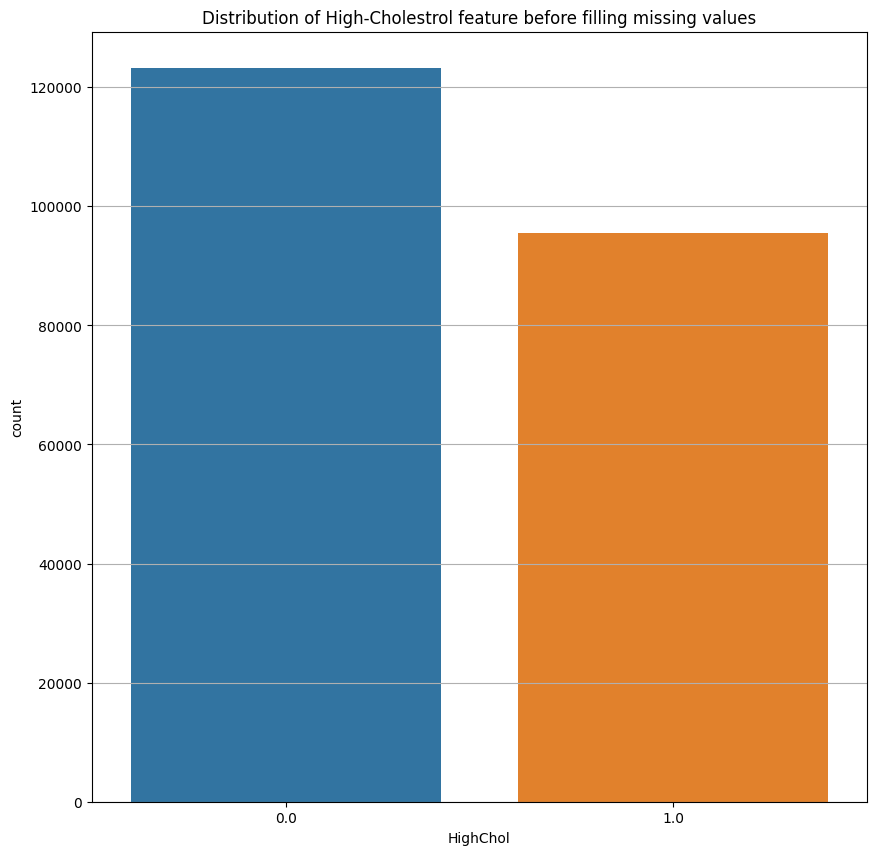

In [108]:
plt.figure(figsize=(10, 10))
sns.countplot(data=mg_DS_Actual_Copy,x='HighChol').yaxis.grid(True)
plt.title('Distribution of High-Cholestrol feature before filling missing values')
plt.show()

In [81]:
missing_feature = 'HighChol'

In [80]:
missing_data = mg_DS_Actual_Copy[mg_DS_Actual_Copy[missing_feature].isna()]
valid_data = mg_DS_Actual_Copy[~mg_DS_Actual_Copy[missing_feature].isna()]

In [84]:
X = valid_data.drop([missing_feature], axis=1)
y = valid_data[missing_feature]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
clf = DecisionTreeClassifier()

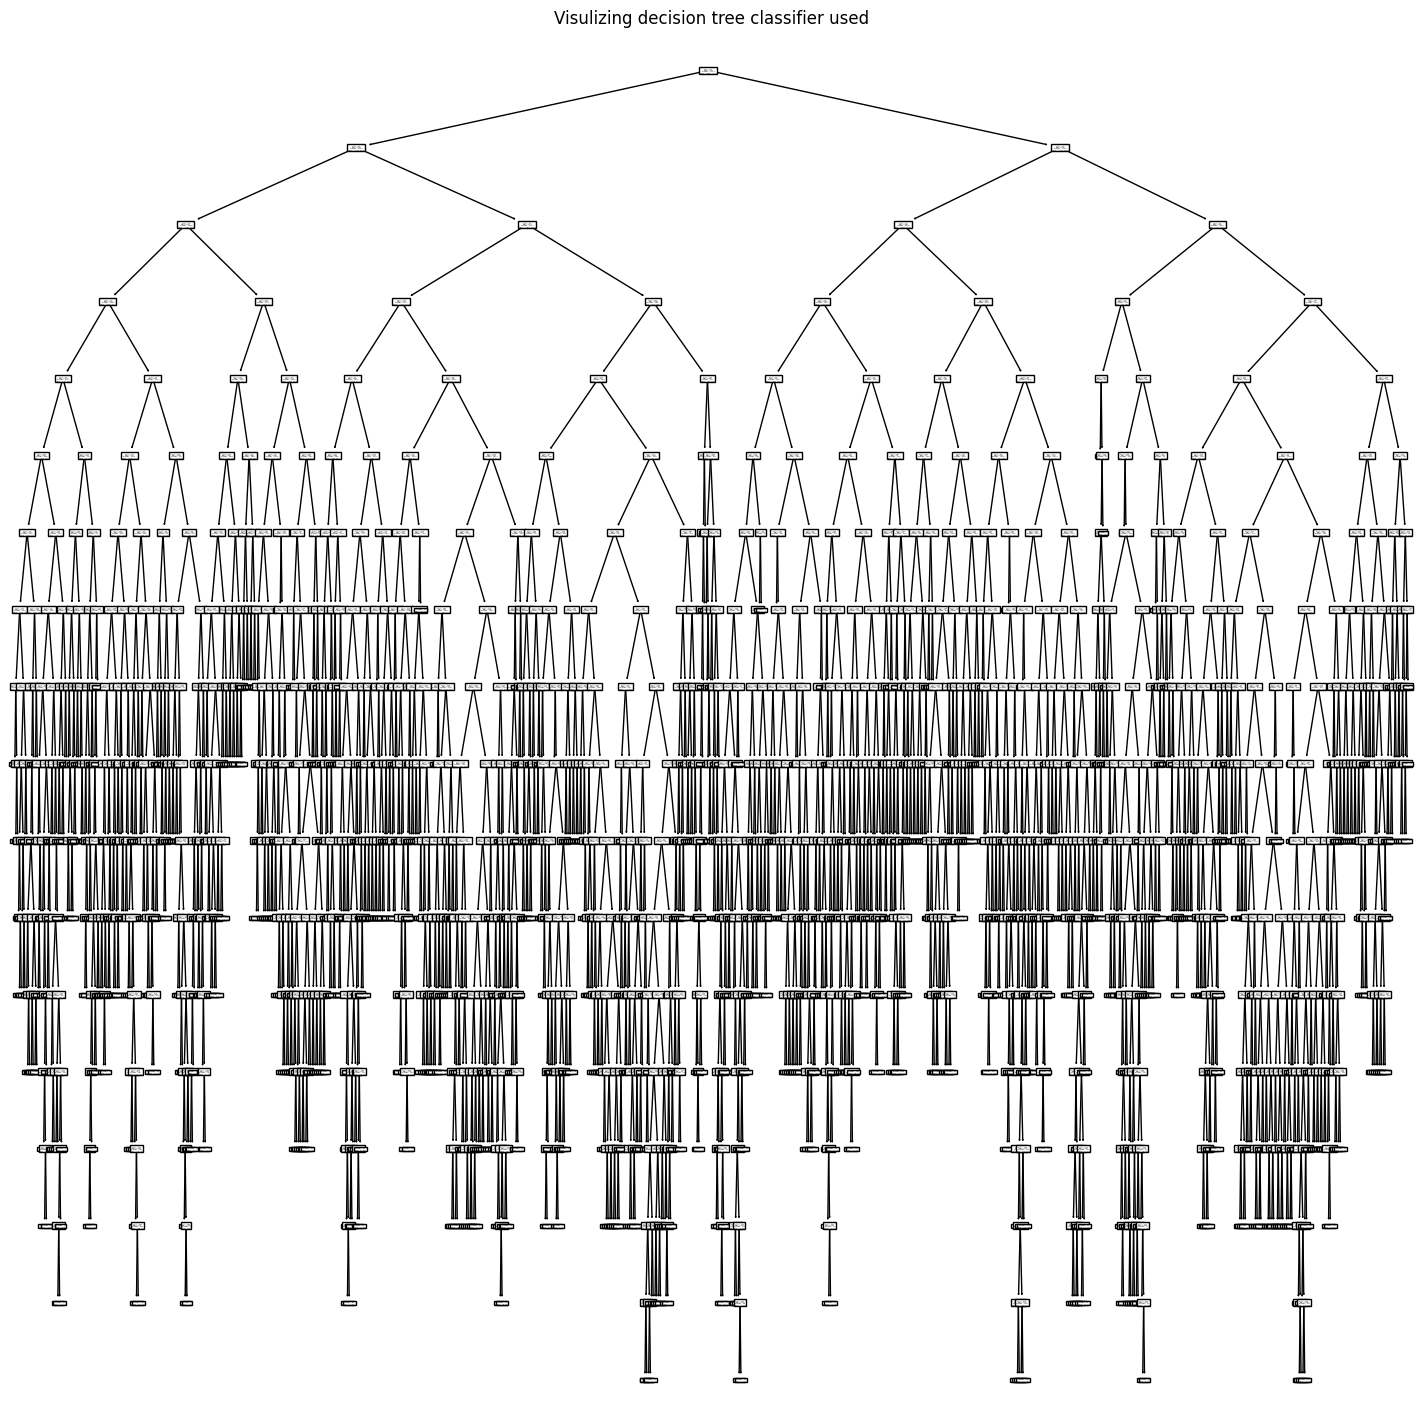

In [117]:
plt.figure(figsize=(18, 18))
plot_tree(clf)
plt.title('Visulizing decision tree classifier used')
plt.show()

In [87]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
predicted_HighChol = clf.predict(missing_data.drop([missing_feature], axis=1))

In [89]:
missing_data[missing_feature] = predicted_HighChol

In [90]:
filled_data = pd.concat([valid_data, missing_data])

In [93]:
print(filled_data.isnull().sum())

Age         0
BMI         0
HighChol    0
HighBP      0
Diabetes    0
dtype: int64


In [94]:
filled_data.to_csv('filled_diabetes_data.csv', index=False)

In [96]:
from google.colab import files
uploaded = files.upload()

Saving filled_diabetes_data.csv to filled_diabetes_data.csv


In [97]:
fully_merged_dataset = pd.read_csv(io.BytesIO(uploaded['filled_diabetes_data.csv']))
fully_merged_dataset_copy = fully_merged_dataset.copy()

In [98]:
fully_merged_dataset_copy.head()

,Age,BMI,HighChol,HighBP,Diabetes
0,9,40.0,1.0,1,0
1,7,25.0,0.0,0,0
2,9,28.0,1.0,1,0
3,11,27.0,0.0,1,0
4,11,24.0,1.0,1,0


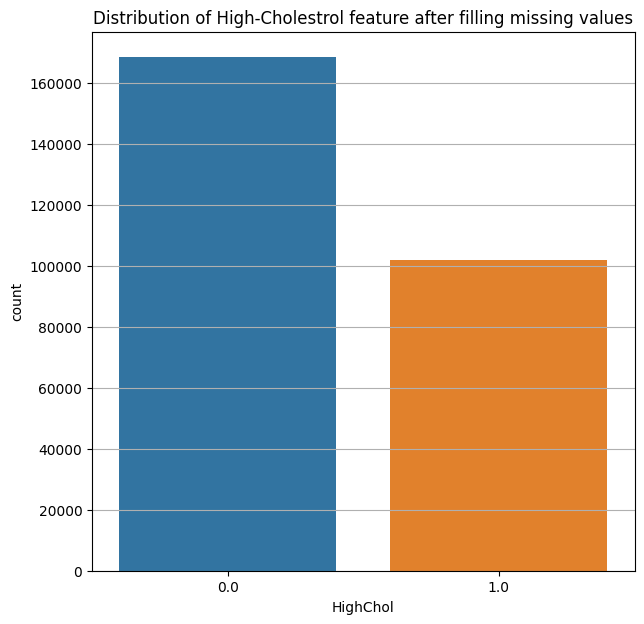

In [110]:
plt.figure(figsize=(7,7))
sns.countplot(data=fully_merged_dataset_copy,x='HighChol').yaxis.grid(True)
plt.title('Distribution of High-Cholestrol feature after filling missing values')
plt.show()

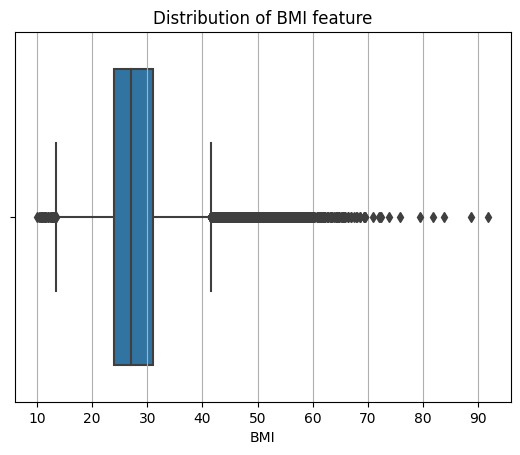

In [111]:
sns.boxplot(data=fully_merged_dataset_copy, x='BMI').xaxis.grid(True)
plt.title('Distribution of BMI feature')
plt.show()

#### from the above box plot we understand that there are outliers in BMI feature and the below correlation matrix refers before treating outliers

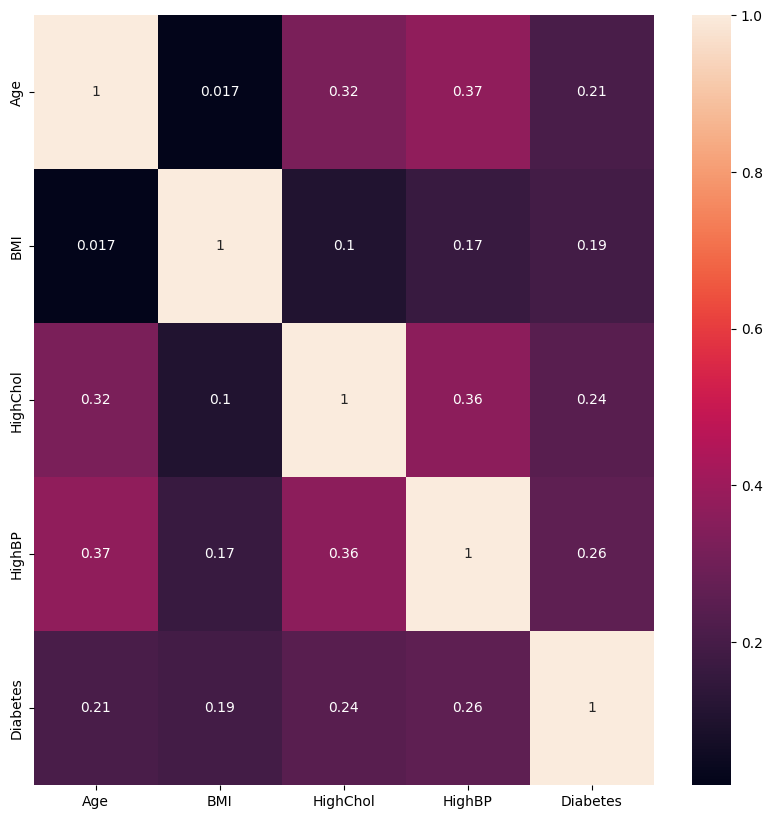

In [99]:
plt.figure(figsize=(10, 10))
sns.heatmap(fully_merged_dataset_copy.corr(), annot=True)
plt.show()

In [119]:
df_OutlierRemoval = fully_merged_dataset_copy.copy()
df_MedianImputation = fully_merged_dataset_copy.copy()

(267882, 5)


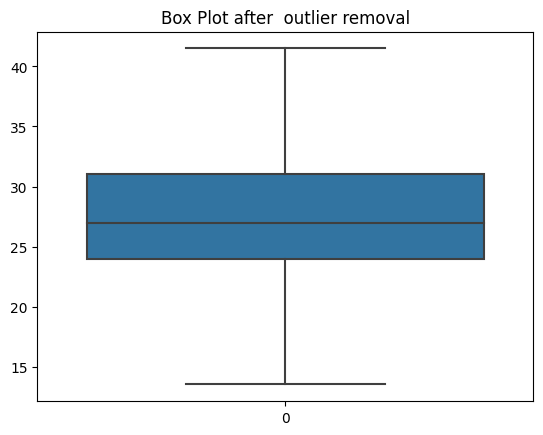

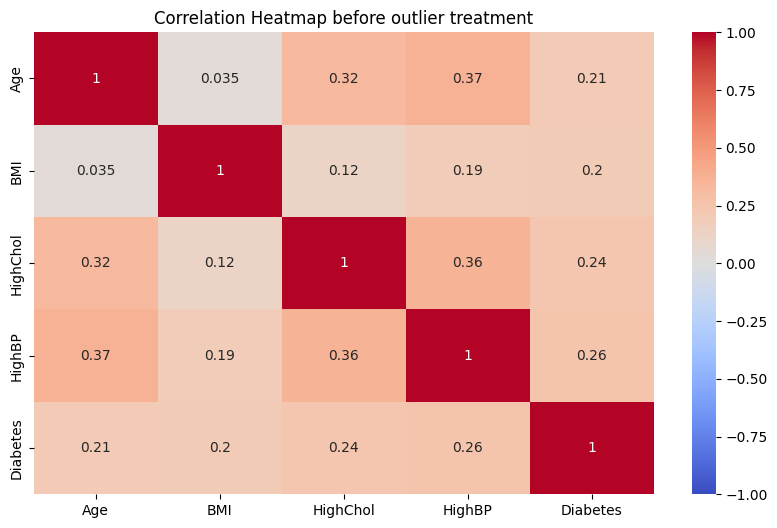

In [120]:
# Outlier Removal
iqr = df_OutlierRemoval['BMI'].quantile(0.75) - df_OutlierRemoval['BMI'].quantile(0.25)

# Calculate the lower and upper bounds
lower_bound = df_OutlierRemoval['BMI'].quantile(0.25) - (1.5 * iqr)
upper_bound = df_OutlierRemoval['BMI'].quantile(0.75) + (1.5 * iqr)

# Drop the outliers
df_OutlierRemoval = df_OutlierRemoval[(df_OutlierRemoval['BMI'] > lower_bound) & (df_OutlierRemoval['BMI'] < upper_bound)]

print(df_OutlierRemoval.shape)

sns.boxplot (df_OutlierRemoval['BMI'])
plt.title("Box Plot after  outlier removal")
plt.show()

corr_matrix = df_OutlierRemoval.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap before outlier treatment')
plt.show()

In [ ]:
# Median Imputation after removal of outliers
q1=0
q3=0
iqr=0
Lower_tail=0
Upper_tail=0
for i in df_OutlierRemoval['BMI']:
  q1 = df_OutlierRemoval['BMI'].quantile(0.25)
  q3 = df_OutlierRemoval['BMI'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  if i > Upper_tail or i < Lower_tail:
    df_OutlierRemoval['BMI'] = df_OutlierRemoval['BMI']. replace (i, np.median(df_OutlierRemoval['BMI']))

print(df_OutlierRemoval.shape)
print(q1,q3,iqr,Lower_tail,Upper_tail)

sns.boxplot (df_OutlierRemoval['BMI'])
plt.title("Box Plot for outlier removal dataframe after median imputation")
plt.show()

corr_matrix = df_OutlierRemoval.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap before outlier treatment')
plt.show()

In [ ]:
# Median Imputation
q1=0
q3=0
iqr=0
Lower_tail=0
Upper_tail=0
for i in df_MedianImputation['BMI']:
  q1 = df_MedianImputation['BMI'].quantile(0.25)
  q3 = df_MedianImputation['BMI'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  if i > Upper_tail or i < Lower_tail:
    df_MedianImputation['BMI'] = df_MedianImputation['BMI']. replace (i, np.median(df_MedianImputation['BMI']))

print(df_MedianImputation.shape)
print(q1,q3,iqr,Lower_tail,Upper_tail)

sns.boxplot (df_MedianImputation['BMI'])
plt.title("Box Plot after Zero value imputation")
plt.show()

corr_matrix = df_MedianImputation.corr()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap before outlier treatment')
plt.show()